## EDA ANALYSIS

Exploratory Data Analysis is all about analyzing the dataset and summarizing the key insights and characteristics of the data.

EDA checklist:

1.   Understanding the dataset, and its shape
2.   Checking the data type of each columns
3.   Categorical & Numerical columns
4.   Checking for missing values
5.   Descriptive summary of the dataset
6.   Groupby for classification problems

# Importing the Dependencies

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures

# Data Collection

In [165]:
# loading the Rotten Tomatoes Movie Dataset from csv file to pandas data frame
audience_data = pd.read_csv('D:/Github/audience_rating_model/Rotten_Tomatoes_Movies3.csv')

# Exploratory Data Analysis

In [ ]:
# printing the first five rows of the dataframe
audience_data.head()

In [ ]:
#Find Shape of Our Dataset (Number of Rows And Number of Columns)
audience_data.shape

In [ ]:
# Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
audience_data.info()

In [ ]:
# checking for missing values
audience_data.isnull().sum()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(audience_data.isnull())
plt.show()

In [ ]:
#Check Proportion of Missing Data
missing_percentage = (audience_data.isnull().sum() / len(audience_data)) * 100
print(missing_percentage.sort_values(ascending=False))

In [172]:
# Calculate median for numerical columns
median_runtime = audience_data['runtime_in_minutes'].median()
median_rating = audience_data['audience_rating'].median()

In [173]:
# Drop columns with too many missing values
audience_data.drop(['critics_consensus'], axis=1, inplace=True)
audience_data['runtime_in_minutes'] = audience_data['runtime_in_minutes'].fillna(median_runtime)
audience_data['audience_rating'] = audience_data['audience_rating'].fillna(median_rating)
audience_data=audience_data.dropna(axis=0)

In [ ]:
#check for duplicate data
dup_data=audience_data.duplicated().any()
print("Are there any duplicated values in data?",dup_data)

In [ ]:
#Get Overall Statistics About The DataFrame
audience_data.describe()

In [ ]:
#Display Title of The Movie Having Runtime >= 300 Minutes
audience_data[audience_data['runtime_in_minutes']>=300]['movie_title']

Distribution of Audience Rating

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(audience_data['audience_rating'], kde=True, color='blue')
plt.title('Distribution of Audience Rating')
plt.show()

Histogram of Movies by year of release

In [ ]:
# Convert the 'in_theaters_d' column to datetime to extract the release year
audience_data['release_year'] = pd.to_datetime(audience_data['in_theaters_date'], format='%d-%m-%Y').dt.year


# Plot histogram
plt.figure(figsize=(10, 6))
release_year_counts = audience_data['release_year'].value_counts().sort_index()
release_year_counts.plot(kind='bar', color='skyblue')

# Set custom x-axis labels
plt.title("Number of Movies by Year of Release")
plt.xlabel("Year")
plt.ylabel("Number of Movies")

# Custom labels and ticks
years = release_year_counts.index  # Get unique years from the data
plt.xticks(
    ticks=range(0, len(years), 5),  # Adjust spacing (e.g., every 5th tick)
    labels=[str(year) for year in years[::5]]  # Display custom labels every 5th year
)

plt.show()

Distribution of Audience Ratings Across the Years

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='audience_rating', data=audience_data)
plt.title("Distribution of Audience Ratings Across Years")
plt.xlabel("Year of Release")
plt.ylabel("Audience Ratings")
plt.show()

Distribution of TomatoMeter Ratings Across the Years

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='tomatometer_rating', data=audience_data)
plt.title("Distribution of TomatoMeter Ratings Across Years")
plt.xlabel("Year of Release")
plt.ylabel("TomatoMeter Ratings")
plt.show()

In [ ]:
#Find The Average Rating For Each Director
audience_data.groupby('writers')['audience_rating'].mean().sort_values(ascending=False)

In [ ]:
# Display Top 10 Lengthy Movies
le = audience_data.nlargest(10, 'runtime_in_minutes')[['movie_title', 'runtime_in_minutes']].set_index('movie_title')

# Fix: Use keyword arguments `x` and `y` explicitly in sns.barplot
sns.barplot(x=le['runtime_in_minutes'], y=le.index)

# Add title
plt.title('Top 10 Lengthy Movies')
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Movie Title')

# Display the plot
plt.show()

In [ ]:
#Display Top 10 Highest Audience Rated Movie Titles And its Writers and directors
top_10=audience_data.nlargest(10,'audience_rating')[['movie_title','audience_rating','writers','directors']].set_index('movie_title')
top_10

In [ ]:
#Find Average Rating of Movies Year-wise

data1 = (
    audience_data.groupby('release_year')[['release_year', 'audience_rating']]
    .mean()
    .sort_values(by='audience_rating', ascending=False)
    .set_index('release_year')
)
data1

Rating counts

In [ ]:
audience_data['rating'].value_counts()
sns.countplot(audience_data, x='rating',palette=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum'])
plt.title('Rating Counts')

Audience Rating for PG, R, NR, G, PG-13, NC-17

In [ ]:
f, ax = plt.subplots(6, 1, figsize=(15, 40))

# Plot for PG
sns.histplot(audience_data[(audience_data['rating'] == 'PG') & 
                             (audience_data['audience_rating'] <= 100)].audience_rating, 
             ax=ax[0], bins=30, kde=True)
ax[0].set_title('Audience Rating for PG', fontsize=16)
ax[0].set_xlabel("Audience Rating", fontsize=12)
ax[0].set_xlim([0, 100])

# Plot for R
sns.histplot(audience_data[(audience_data['rating'] == 'R') & 
                             (audience_data['audience_rating'] <= 100)].audience_rating, 
             ax=ax[1], bins=30, kde=True)
ax[1].set_title('Audience Rating for R', fontsize=16)
ax[1].set_xlabel("Audience Rating", fontsize=12)
ax[1].set_xlim([0, 100])

# Plot for NR
sns.histplot(audience_data[(audience_data['rating'] == 'NR') & 
                             (audience_data['audience_rating'] <= 100)].audience_rating, 
             ax=ax[2], bins=30, kde=True)
ax[2].set_title('Audience Rating for NR', fontsize=16)
ax[2].set_xlabel("Audience Rating", fontsize=12)
ax[2].set_xlim([0, 100])

# Plot for G
sns.histplot(audience_data[(audience_data['rating'] == 'G') & 
                             (audience_data['audience_rating'] <= 100)].audience_rating, 
             ax=ax[3], bins=30, kde=True)
ax[3].set_title('Audience Rating for G', fontsize=16)
ax[3].set_xlabel("Audience Rating", fontsize=12)
ax[3].set_xlim([0, 100])

# Plot for PG-13
sns.histplot(audience_data[(audience_data['rating'] == 'PG-13') & 
                             (audience_data['audience_rating'] <= 100)].audience_rating, 
             ax=ax[4], bins=30, kde=True)
ax[4].set_title('Audience Rating for PG-13', fontsize=16)
ax[4].set_xlabel("Audience Rating", fontsize=12)
ax[4].set_xlim([0, 100])

# Plot for NC-17
sns.histplot(audience_data[(audience_data['rating'] == 'NC17') & 
                             (audience_data['audience_rating'] <= 100)].audience_rating, 
             ax=ax[5], bins=30, kde=True)
ax[5].set_title('Audience Rating for NC-17', fontsize=16)
ax[5].set_xlabel("Audience Rating", fontsize=12)
ax[5].set_xlim([0, 100])

plt.tight_layout()
plt.show()


Tomatometer Status Counts

In [ ]:
audience_data['tomatometer_status'].value_counts()
sns.countplot(audience_data, x='tomatometer_status',palette=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Rating Counts')

audience rating in Certified Fresh, Fresh, Rotten

In [ ]:
f, ax = plt.subplots(3, 1, figsize=(15, 30))

sns.histplot(audience_data[(audience_data['tomatometer_status'] == 'Certified Fresh') & 
                             (audience_data['audience_rating'] <= 100)].audience_rating, 
             ax=ax[0], bins=30, kde=True)
ax[0].set_title('Audience Rating in Certified Fresh', fontsize=16)
ax[0].set_xlabel("Audience Rating", fontsize=12)
ax[0].set_xlim([0, 100])

sns.histplot(audience_data[(audience_data['tomatometer_status'] == 'Fresh') & 
                             (audience_data['audience_rating'] <= 100)].audience_rating, 
             ax=ax[1], bins=30, kde=True)
ax[1].set_title('Audience Rating in Fresh', fontsize=16)
ax[1].set_xlabel("Audience Rating", fontsize=12)
ax[1].set_xlim([0, 100])

sns.histplot(audience_data[(audience_data['tomatometer_status'] == 'Rotten') & 
                             (audience_data['audience_rating'] <= 100)].audience_rating, 
             ax=ax[2], bins=30, kde=True)
ax[2].set_title('Audience Rating in Rotten', fontsize=16)
ax[2].set_xlabel("Audience Rating", fontsize=12)
ax[2].set_xlim([0, 100])

plt.tight_layout()
plt.show()


In [ ]:
#Number of Movies Produced by top 10 StudioNames
studio_10 = audience_data['studio_name'].value_counts().head(10)

# Generate a color palette with a unique color for each bar
colors = plt.cm.tab10(range(len(studio_10)))  # Use 'tab10' colormap for 10 distinct colors

plt.figure(figsize=(10, 6))
studio_10.plot(kind='bar', color=colors)  
plt.title("Top 10 Studio Names")
plt.xlabel("Studio")
plt.ylabel("Number of Movies")
plt.show()

In [ ]:
#Number of Movies Directed by top 10 directors
top_10_directors = audience_data['directors'].value_counts().head(10)

# Generate a color palette with a unique color for each bar
colors = plt.cm.tab10(range(len(studio_10)))  # Use 'tab10' colormap for 10 distinct colors

plt.figure(figsize=(10, 6))
top_10_directors.plot(kind='bar', color=colors)  
plt.title("Top 10 directors")
plt.xlabel("DDirectors")
plt.ylabel("Number of Movies")
plt.show()

In [ ]:
#Number of Movies by top 10 genres
top_10_genres = audience_data['genre'].value_counts().head(10).sort_values(ascending=False)

# Generate a color palette with a unique color for each bar
colors = plt.cm.tab10(range(len(studio_10)))  # Use 'tab10' colormap for 10 distinct colors

plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='barh', color=colors)  
plt.title("Top 10 Genres")
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.show()

Average Audience raying per Genre

In [ ]:
# Extract all unique genres
unique_genres = set(genre.strip() for genres in audience_data['genre'].dropna() for genre in genres.split(','))
print(f"Number of unique genres: {len(unique_genres)}")
print(f"Unique genres: {unique_genres}")

# Split the genres for each movie and flatten the list to count occurrences
genres = audience_data['genre'].str.split(',').explode()

# Count the occurrences of each genre
genre_counts = genres.value_counts()

# Ensure all 22 genres are included, even if a genre has a count of 0
genre_counts = genre_counts.reindex(unique_genres, fill_value=0)

# Display the result
print("unique genre counts",genre_counts)

# Split the genres for each movie and explode the list to make each genre a separate row
genres = audience_data['genre'].str.split(',').explode()

# Combine the exploded genres with the original ratings
ratings_by_genre = pd.DataFrame({
    'genre': genres,
    'audience_rating': audience_data.loc[genres.index, 'audience_rating'].values
})

# Calculate the average rating for each genre
avg_ratings_by_genre = ratings_by_genre.groupby('genre')['audience_rating'].mean()

# Ensure all 22 genres are included, even if a genre has a count of 0
avg_ratings_by_genre = avg_ratings_by_genre.reindex(unique_genres, fill_value=0)

# Plot the average ratings for each genre
plt.figure(figsize=(12, 8))
avg_ratings_by_genre.plot(kind='bar', color='skyblue')
plt.title('Average Audience Rating per Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Audience Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top 10 genres with the highest average rating
top_10_genres = avg_ratings_by_genre.sort_values(ascending=False).head(10)

# Plot top 10 genres with the highest ratings
plt.figure(figsize=(12, 8))
top_10_genres.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Genres with Highest Average Audience Ratings', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Audience Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Genres and Tomatometer Status Distribution

In [ ]:
#Genres and Tomatometer Status Distribution
# Define data for genres and tomatometer status
genres = audience_data['genre'].value_counts().head(7)  # Top 7 genres
group_names = genres.index  # Genre names
group_size = genres.values  # Genre counts

# Tomatometer status distribution for each genre
# This assumes you have a DataFrame with genres and tomatometer_status counts grouped
genre_status = audience_data.groupby(['genre', 'tomatometer_status']).size().unstack(fill_value=0)

# Prepare subgroup names and sizes
subgroup_names = ['Certified Fresh', 'Fresh', 'Rotten'] * len(group_names)
subgroup_size = []
for genre in group_names:
    subgroup_size.append(genre_status.loc[genre, 'Certified Fresh'])
    subgroup_size.append(genre_status.loc[genre, 'Fresh'])
    subgroup_size.append(genre_status.loc[genre, 'Rotten'])

# Colors for the chart
outer_colors = plt.cm.viridis([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
inner_colors = ['green', 'gold', 'red'] * len(group_names)

# Create the nested pie chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('equal')  # Ensure the pie chart is a circle

# Outer pie chart
outer_pie, _ = ax.pie(group_size, radius=1.5, labels=group_names, colors=outer_colors)
plt.setp(outer_pie, width=0.4, edgecolor='white')

# Inner pie chart
inner_pie, _ = ax.pie(subgroup_size, radius=1.1, labels=subgroup_names, labeldistance=0.7, colors=inner_colors)
plt.setp(inner_pie, width=0.3, edgecolor='white')



# Display the chart
plt.margins(0, 0)
plt.show()


In [ ]:
# Define the top genres
top_genres = audience_data['genre'].value_counts().head(7)  # Top 7 genres
group_names = top_genres.index  # Genre names
group_size = top_genres.values  # Genre counts

# Ratings distribution for each genre
# Assuming you have a DataFrame with genres and ratings counts grouped
genre_rating = audience_data.groupby(['genre', 'rating']).size().unstack(fill_value=0)

# Prepare subgroup names and sizes
subgroup_names = ['G', 'NC17', 'NR', 'PG', 'PG-13', 'R'] * len(group_names)
subgroup_size = []
for genre in group_names:
    subgroup_size.extend(genre_rating.loc[genre, ['G', 'NC17', 'NR', 'PG', 'PG-13', 'R']])

# Colors for the chart
outer_colors = plt.cm.viridis([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
inner_colors = ['blue', 'purple', 'gray', 'orange', 'cyan', 'red'] * len(group_names)

# Create the nested pie chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('equal')  # Ensure the pie chart is a circle

# Outer pie chart (Genres)
outer_pie, _ = ax.pie(group_size, radius=1.5, labels=group_names, colors=outer_colors)
plt.setp(outer_pie, width=0.4, edgecolor='white')

# Inner pie chart (Ratings)
inner_pie, _ = ax.pie(subgroup_size, radius=1.1, labels=None, colors=inner_colors)
plt.setp(inner_pie, width=0.3, edgecolor='white')

# Add legend for the inner pie chart (Ratings)
ratings_labels = ['G', 'NC17', 'NR', 'PG', 'PG-13', 'R']
ratings_patches = [plt.Line2D([0], [0], color=color, lw=4) for color in inner_colors[:6]]
plt.legend(ratings_patches, ratings_labels, title="Ratings", loc="upper right", bbox_to_anchor=(1.3, 1))

# Display the chart
plt.margins(0, 0)
plt.show()


In [ ]:
audience_data.columns

# Model Building

In [8]:
audience_df = pd.read_csv('D:/Github/audience_rating_model/Rotten_Tomatoes_Movies3.csv')

In [9]:
audience_df.isna().sum().sort_values(ascending=False)

critics_consensus     8329
writers               1349
in_theaters_date       815
studio_name            416
cast                   284
audience_rating        252
runtime_in_minutes     155
directors              114
movie_info              24
genre                   17
on_streaming_date        2
movie_title              0
rating                   0
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
dtype: int64

In [10]:
from textblob import TextBlob
audience_df['critics_flag'] = audience_df['critics_consensus'].notna().astype(int)

def perform_sentiment_analysis(text):
    sentiment = TextBlob(text).sentiment.polarity  # Example: TextBlob polarity score
    return sentiment

# Apply sentiment analysis only for rows where 'critics_flag' is 1
audience_df['sentiment_score'] = audience_df.apply(
    lambda row: perform_sentiment_analysis(row['critics_consensus']) if row['critics_flag'] == 1 else None,
    axis=1
)


In [11]:

# Fill NaN values in date columns with empty strings
audience_df['in_theaters_date'] = audience_df['in_theaters_date'].fillna('')
audience_df['on_streaming_date'] = audience_df['on_streaming_date'].fillna('')

# Fill other object columns with "<column_name>_null"
for col in audience_df.select_dtypes('object').columns:
    audience_df[col] = audience_df[col].fillna(f"{col}_null")

# Convert the date columns to datetime format
audience_df['in_theaters_date'] = pd.to_datetime(audience_df['in_theaters_date'], errors='coerce')
audience_df['on_streaming_date'] = pd.to_datetime(audience_df['on_streaming_date'], errors='coerce')

# Calculate the number of days between 'in_theaters_date' and 'on_streaming_date'
# audience_df['days_to_streaming'] = (audience_df['on_streaming_date'] - audience_df['in_theaters_date']).dt.days

# Extract additional date-related features
audience_df['in_theaters_year'] = audience_df['in_theaters_date'].dt.year
audience_df['in_theaters_month'] = audience_df['in_theaters_date'].dt.month
audience_df['on_streaming_year'] = audience_df['on_streaming_date'].dt.year
audience_df['on_streaming_month'] = audience_df['on_streaming_date'].dt.month

# Handle rows where dates could not be parsed
# audience_df['days_to_streaming'] = audience_df['days_to_streaming'].fillna(-1).astype(int)

# Display the resulting DataFrame
print(audience_df.head())
# audience_df[audience_df.select_dtypes('object').columns] = audience_df.select_dtypes('object').fillna('')

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  A teenager discovers he's the descendant of a ...   
1  Kate has a lot on her mind. There's the ethics...   
2  Blake Edwards' 10 stars Dudley Moore as George...   
3  A Puerto Rican youth is on trial for murder, a...   
4  This 1954 Disney version of Jules Verne's 20,0...   

                                   critics_consensus rating  \
0  Though it may seem like just another Harry Pot...     PG   
1  Nicole Holofcener's newest might seem slight i...      R   
2                             critics_consensus_null      R   
3  Sidney Lumet's feature debut is a superbly wri...     NR   
4  One of D

C:\Users\USER\AppData\Local\Temp\ipykernel_684\3332193009.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  audience_df['on_streaming_date'] = pd.to_datetime(audience_df['on_streaming_date'], errors='coerce')


In [12]:
drop_cols=['movie_info', 'critics_consensus','critics_flag']
audience_df.drop(columns=drop_cols, axis=1, inplace=True)

In [13]:
audience_df.shape

(16638, 19)

In [14]:
audience_df.dropna(subset=['audience_rating'], inplace=True)
audience_df.reset_index(drop=True, inplace=True)

In [15]:
audience_df['audience_rating']

0        53.0
1        64.0
2        53.0
3        97.0
4        74.0
         ... 
16381    74.0
16382    92.0
16383    87.0
16384    91.0
16385    62.0
Name: audience_rating, Length: 16386, dtype: float64

In [16]:
audience_df.select_dtypes('object').nunique()

movie_title           15870
rating                    6
genre                  1076
directors              8154
writers               11966
cast                  16110
studio_name            2832
tomatometer_status        3
dtype: int64

In [17]:
# Number of directors in each movie
audience_df['num_directors'] = audience_df['directors'].apply(lambda x : len(x.split(',')))
#movie with highest No. of directors
audience_df[audience_df['num_directors'] == audience_df['num_directors'].max()]

,movie_title,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,sentiment_score,in_theaters_year,in_theaters_month,on_streaming_year,on_streaming_month,num_directors
2170,ABCs of Death 2,NR,Horror,"Ahron Keshales, Navot Papushado, Bill Plympton...",writers_null,"Beatrice Dalle, Victoria Broom, Andy Nyman, Ma...",NaT,2015-02-03,125.0,Magnet Releasing,Fresh,73,33,39.0,-1.850372e-17,NaN,NaN,2015.0,2.0,31
13462,The ABCs of Death,R,"Horror, Mystery & Suspense","Christopher Smith (VIII), Angela Bettis, Simon...",writers_null,"Ingrid Bolso Berdal, Neil Maskell, Kyra Zagors...",2013-08-03,2013-05-21,129.0,Magnolia Pictures,Rotten,37,68,23.0,-5.000000e-02,2013.0,8.0,2013.0,5.0,31


In [18]:
#Number of writers in each movie
audience_df['num_writers'] = audience_df['writers'].apply(lambda x : len(x.split(',')))
# Maximum No. of writers
audience_df[audience_df['num_writers'] == audience_df['num_writers'].max()]

,movie_title,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,...,tomatometer_rating,tomatometer_count,audience_rating,sentiment_score,in_theaters_year,in_theaters_month,on_streaming_year,on_streaming_month,num_directors,num_writers
16366,Ziegfeld Follies,NR,"Classics, Musical & Performing Arts","Vincente Minnelli, Lemuel Ayers, Charles Walte...","Robert Lewis, Lemuel Ayers, Charles Walters, H...","Fred Astaire, Judy Garland, Gene Kelly, Willia...",NaT,2006-04-25,109.0,MGM Home Entertainment,...,67,9,59.0,NaN,NaN,NaN,2006.0,4.0,7,34


In [19]:
# Number of casts in each movie
audience_df['num_casts'] = audience_df['cast'].apply(lambda x : len(x.split(',')))
# Maximum No.of Casts
audience_df[audience_df['num_casts'] == audience_df['num_casts'].max()]

,movie_title,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,...,tomatometer_count,audience_rating,sentiment_score,in_theaters_year,in_theaters_month,on_streaming_year,on_streaming_month,num_directors,num_writers,num_casts
906,Malcolm X,PG-13,Drama,Spike Lee,"Spike Lee, Arnold Perl","Denzel Washington, Angela Bassett, Al Freeman ...",NaT,2000-01-18,201.0,Warner Bros.,...,57,91.0,0.466667,NaN,NaN,2000.0,1.0,1,2,306


In [20]:
# Replacing tomatometer status with numeric values
audience_df['tomatometer_status'].replace(['Rotten','Fresh','Certified Fresh'],[0,1,2],inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_684\2796174784.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  audience_df['tomatometer_status'].replace(['Rotten','Fresh','Certified Fresh'],[0,1,2],inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_684\2796174784.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_do

In [21]:
audience_df['tomatometer_status'].value_counts()

tomatometer_status
0    7160
1    6275
2    2951
Name: count, dtype: int64

In [22]:
audience_df['in_theaters_date'] = pd.to_datetime(audience_df['in_theaters_date'],dayfirst=True)
audience_df['release_year'] = audience_df['in_theaters_date'].dt.year

In [23]:
audience_df.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,sentiment_score,in_theaters_year,in_theaters_month,on_streaming_year,on_streaming_month,num_directors,num_writers,num_casts,release_year
count,6809,16385,16239.000000,16386.000000,16386.000000,16386.000000,16386.000000,8281.000000,6809.000000,6809.000000,16385.000000,16385.000000,16386.000000,16386.000000,16386.000000,6809.000000
mean,1997-09-11 06:04:48.676751488,2008-07-12 03:58:25.962770944,102.563520,0.743134,60.327963,57.272916,60.470829,0.129701,1997.295785,5.634161,2008.036070,6.455539,1.138777,1.732638,25.394300,1997.295785
min,1914-01-06 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,0.000000,5.000000,0.000000,-1.000000,1914.000000,1.000000,1935.000000,1.000000,1.000000,1.000000,1.000000,1914.000000
25%,1989-01-01 00:00:00,2003-01-07 00:00:00,90.000000,0.000000,38.000000,12.000000,45.000000,-0.008333,1989.000000,1.000000,2003.000000,3.000000,1.000000,1.000000,10.000000,1989.000000
50%,2004-12-01 00:00:00,2008-02-26 00:00:00,99.000000,1.000000,66.000000,29.000000,62.000000,0.136111,2004.000000,6.000000,2008.000000,6.000000,1.000000,1.000000,20.000000,2004.000000
75%,2012-12-10 00:00:00,2014-03-25 00:00:00,111.000000,1.000000,85.000000,78.000000,77.000000,0.290909,2012.000000,9.000000,2014.000000,9.000000,1.000000,2.000000,36.000000,2012.000000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,2.000000,100.000000,497.000000,100.000000,1.000000,2019.000000,12.000000,2019.000000,12.000000,31.000000,34.000000,306.000000,2019.000000
std,NaN,NaN,25.039112,0.742364,28.588650,66.638523,20.462368,0.248481,20.581186,3.837085,6.467031,3.425831,0.652986,1.137957,20.513037,20.581186


<Axes: >

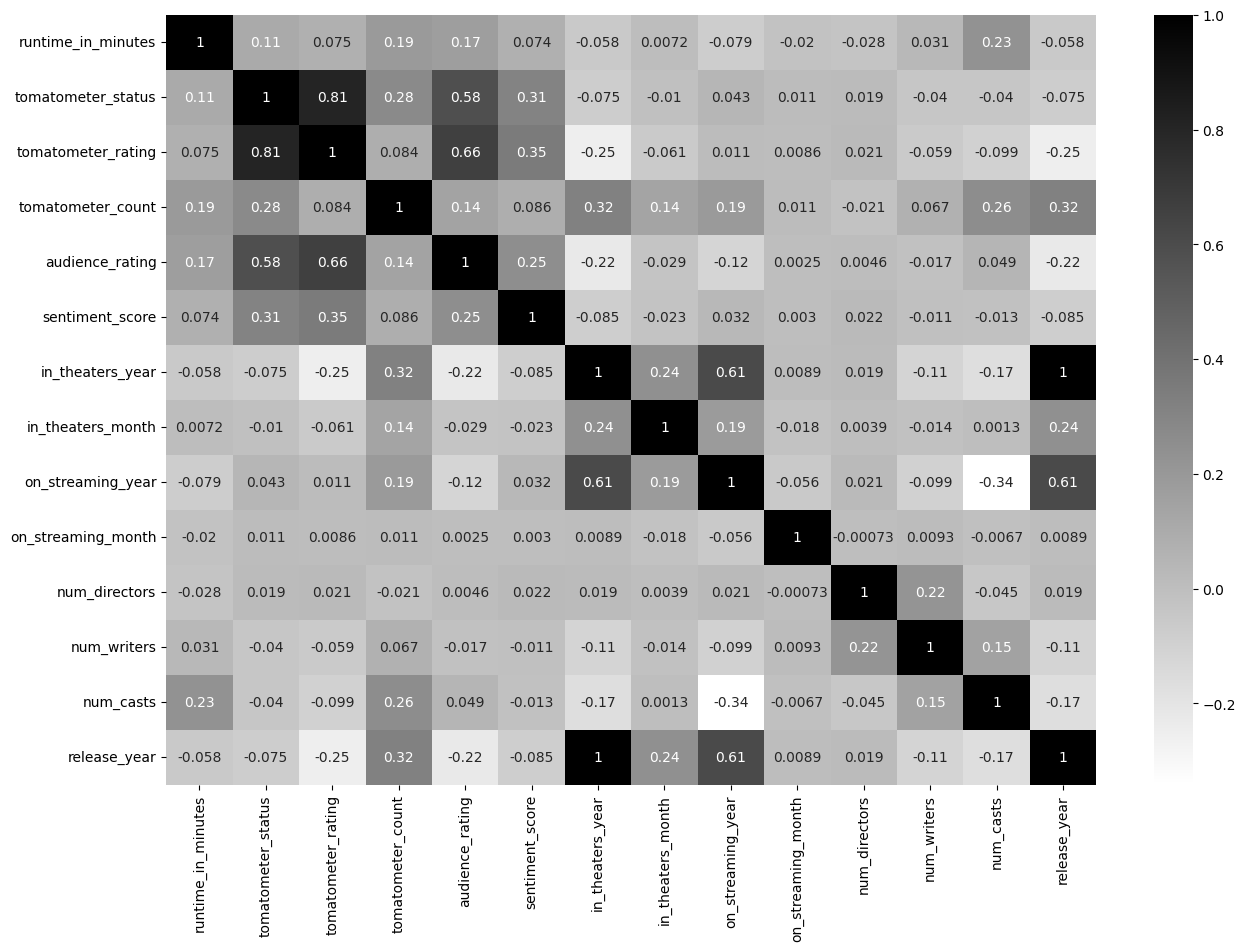

In [24]:
# Correlation
corr = audience_df.select_dtypes('number').corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='binary')

In [25]:
# Correlation with the target value 'Audience rating'
audience_df.select_dtypes('number').corr()['audience_rating'].sort_values(ascending=False)

audience_rating       1.000000
tomatometer_rating    0.660111
tomatometer_status    0.582228
sentiment_score       0.253643
runtime_in_minutes    0.168507
tomatometer_count     0.141012
num_casts             0.049081
num_directors         0.004587
on_streaming_month    0.002474
num_writers          -0.016563
in_theaters_month    -0.028938
on_streaming_year    -0.120884
in_theaters_year     -0.223488
release_year         -0.223488
Name: audience_rating, dtype: float64

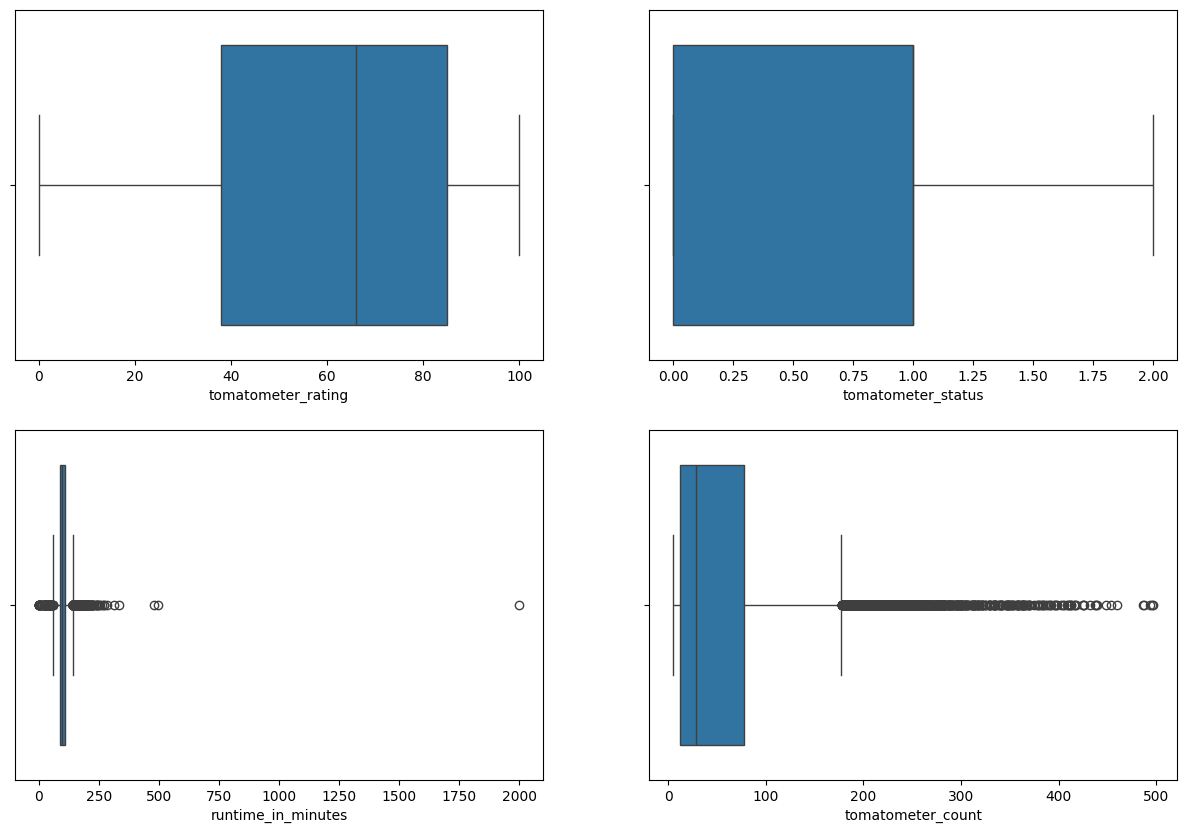

In [26]:
# Columns with high correlation
# checking for outliers

box_col = ['tomatometer_rating','tomatometer_status','runtime_in_minutes','tomatometer_count']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax = ax.flatten()
for index, value in enumerate(box_col):
    sns.boxplot(data=audience_df, x=value, ax=ax[index])

In [27]:
# Creating masks to filter out outliers based on IQR
mask1 = audience_df['tomatometer_rating'] < iqr(audience_df['tomatometer_rating']) * 1.5 + np.percentile(audience_df['tomatometer_rating'], 75)
mask2 = audience_df['tomatometer_status'] < iqr(audience_df['tomatometer_status']) * 1.5 + np.percentile(audience_df['tomatometer_status'], 75)
mask3 = audience_df['runtime_in_minutes'] < iqr(audience_df['runtime_in_minutes']) * 1.5 + np.percentile(audience_df['runtime_in_minutes'], 75)
mask4 = audience_df['tomatometer_count'] < iqr(audience_df['tomatometer_count']) * 1.5 + np.percentile(audience_df['tomatometer_count'], 75)

# Combining masks to filter out outliers
# filtered_df = audience_df[mask1 & mask2 & mask3 & mask4]
filtered_df=audience_df
# Print the shape before and after outlier removal
print("Original DataFrame shape:", audience_df.shape)
print("Filtered DataFrame shape:", filtered_df.shape)

Original DataFrame shape: (16386, 23)
Filtered DataFrame shape: (16386, 23)


In [28]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec


# Step 1: Preprocess the 'Cast' feature
audience_df['Cast_Tokens'] = audience_df['cast'].apply(lambda x: x.split(','))

# Step 2: Train Word2Vec on the tokens
# Flatten list of all tokens for training Word2Vec
tokenized_cast = audience_df['Cast_Tokens'].tolist()
model = Word2Vec(sentences=tokenized_cast, vector_size=120, window=5, min_count=1, workers=4)

# Step 3: Create document vectors (mean of word vectors for each document)
def get_document_vector(tokens, model):
    # Fetch vector for each token, ignoring out-of-vocabulary words
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)  # Average of word vectors
    else:
        return np.zeros(model.vector_size)  # Fallback to zero vector

audience_df['Cast_Vector'] = audience_df['Cast_Tokens'].apply(lambda tokens: get_document_vector(tokens, model))

# Step 4: Concatenate the vector with the DataFrame
# Convert list of vectors into a DataFrame with individual vector components as columns
vector_df = pd.DataFrame(audience_df['Cast_Vector'].tolist(), columns=[f'vec_{i}' for i in range(model.vector_size)])
audience_df = pd.concat([audience_df.drop(columns=['Cast_Vector']), vector_df], axis=1)
audience_df.drop(columns=['cast', 'Cast_Tokens'], inplace=True, axis=1)

# Final Dataset
audience_df

,movie_title,rating,genre,directors,writers,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,...,vec_110,vec_111,vec_112,vec_113,vec_114,vec_115,vec_116,vec_117,vec_118,vec_119
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,2010-12-02,2010-06-29,83.0,20th Century Fox,0,...,-0.000134,-0.000145,0.000053,-0.000337,-0.000683,2.799845e-04,0.000650,0.000433,0.000048,-0.000734
1,Please Give,R,Comedy,Nicole Holofcener,Nicole Holofcener,NaT,2010-10-19,90.0,Sony Pictures Classics,2,...,-0.003831,-0.000185,-0.000481,-0.000277,0.000816,-8.316132e-04,0.000585,-0.000044,0.000847,0.000073
2,10,R,"Comedy, Romance",Blake Edwards,Blake Edwards,1979-05-10,1997-08-27,118.0,Waner Bros.,1,...,-0.000064,-0.000642,0.000411,0.000525,0.000369,-1.965837e-04,-0.000365,0.001037,-0.000102,-0.000141
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",Sidney Lumet,Reginald Rose,NaT,2001-03-06,95.0,Criterion Collection,2,...,-0.003410,-0.001701,0.000027,0.000884,-0.001283,-1.661521e-03,0.001685,0.002405,-0.000944,0.000735
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,1954-01-01,2003-05-20,127.0,Disney,1,...,0.001895,-0.001674,0.001486,0.001205,-0.001100,-1.100461e-03,0.000451,0.000555,-0.001373,0.000478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16381,Zoot Suit,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,1981-02-10,2003-05-27,104.0,MCA Universal Home Video,0,...,0.000353,-0.000567,-0.000013,-0.000141,-0.000927,5.933656e-04,-0.000819,-0.000708,-0.000212,-0.001078
16382,Zootopia,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston",2016-04-03,2016-06-07,108.0,Walt Disney Animation Studios,2,...,-0.000113,0.000069,-0.000951,-0.000262,0.000207,7.325400e-07,-0.000143,0.000144,-0.000947,-0.000293
16383,Zorba the Greek,NR,"Action & Adventure, Art House & International,...",directors_null,writers_null,NaT,2004-08-03,142.0,Fox,1,...,-0.000283,-0.000538,0.000816,-0.000378,0.000407,-8.493981e-04,-0.001471,0.001717,0.002122,-0.002240
16384,Zulu,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble",NaT,2001-02-02,139.0,Paramount Pictures,1,...,0.000024,-0.001217,0.000194,0.000344,0.000119,-6.771440e-04,0.000570,0.000174,0.000515,0.000481


In [29]:
filtered_df=audience_df.copy()

In [30]:
# Separate features and target
target = filtered_df['audience_rating'].copy()
filtered_df.drop('audience_rating', axis=1, inplace=True)
y = target
X = filtered_df

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
# categorical_split= ['directors', 'genre', 'cast']
categorical_split=['directors','genre']
categorical_final= [i for i in categorical_cols if i not in categorical_split]


In [31]:
print(y.shape)
audience_df.shape

(16386,)


(16386, 142)

In [32]:
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")

Length of X: 16386
Length of y: 16386


In [33]:

# Correct `feature_engineer_split` function
def feature_engineer_split(df, column_name, unique_vals):
    # Fill NaN values
    df[column_name] = df[column_name].fillna('null')
    
    # Split values and ensure lists
    _list = df[column_name].str.split(",")
    
    # Create a dictionary to store the new columns
    _cols = {f'{val}': [] for val in unique_vals}

    for row in _list:
        row_set = set(row) if row else set()
        for val in unique_vals:
            _cols[f'{val}'].append(1 if val in row_set else 0)

    # Create a DataFrame from the dictionary with the same index as the original DataFrame
    _df = pd.DataFrame(_cols, index=df.index)

    # Concatenate the new columns with the original DataFrame
    df = pd.concat([df, _df], axis=1)

    return df

# # Ensure categorical_split and other variables are defined
# categorical_split = ['directors', 'genre', 'cast']  # Replace with your actual columns
# numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Process categorical columns with splitting logic
for column in categorical_split:
    print(f'Processing column: {column}')
    
    # Check the length of X before processing
    print(f"Length of X before processing column {column}: {len(X)}")
    
    # Fill missing values
    X[column] = X[column].fillna('null')
    
    # Split and identify unique values
    _list = X[column].str.split(",")
    unique_vals = set()
    for row in _list:
        if row:  # Avoid empty rows
            unique_vals.update(row)
    unique_vals = sorted(unique_vals)  # Sort to maintain consistency
    
    # Apply feature engineering
    X = feature_engineer_split(X, column, unique_vals)
    
    # Drop the original column
    X.drop(columns=[column], inplace=True)
    
    # Check the length of X after processing
    print(f"Length of X after processing column {column}: {len(X)}")
    print(f'Finished processing column: {column}')

# Update categorical_cols after feature engineering
categorical_cols = [col for col in X.select_dtypes(include=['object']).columns if col not in categorical_split]


# Preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler()),
    # ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# # Synchronize X and y indices
# common_index = X.index.intersection(y.index)
# X = X.loc[common_index]
# y = y.loc[common_index]

# print(f"After synchronization: Length of X = {len(X)}, Length of y = {len(y)}")

# Stratified split
if len(y.unique()) > 1:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
else:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split completed successfully.")

Processing column: directors
Length of X before processing column directors: 16386
Length of X after processing column directors: 16386
Finished processing column: directors
Processing column: genre
Length of X before processing column genre: 16386
Length of X after processing column genre: 16386
Finished processing column: genre
Data split completed successfully.


In [35]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Step 3: Model Training and Evaluation
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'SVR': SVR()
}

In [37]:
results = []
best_model = None
best_r2_score = -np.inf

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'\n{model_name} Results:\nMean Squared Error (MSE): {mse:.2f}\nR-squared (R2) Score: {r2:.2f}\n')

    results.append({'Model': model_name, 'MSE': mse, 'R2': r2})

    if r2 > best_r2_score:
        best_r2_score = r2
        best_model = pipeline


RandomForest Results:
Mean Squared Error (MSE): 202.55
R-squared (R2) Score: 0.52


GradientBoosting Results:
Mean Squared Error (MSE): 197.90
R-squared (R2) Score: 0.53


AdaBoost Results:
Mean Squared Error (MSE): 231.82
R-squared (R2) Score: 0.45


LinearRegression Results:
Mean Squared Error (MSE): 235.83
R-squared (R2) Score: 0.44


Ridge Results:
Mean Squared Error (MSE): 208.42
R-squared (R2) Score: 0.50


Lasso Results:
Mean Squared Error (MSE): 224.07
R-squared (R2) Score: 0.46


DecisionTree Results:
Mean Squared Error (MSE): 361.27
R-squared (R2) Score: 0.14


SVR Results:
Mean Squared Error (MSE): 216.97
R-squared (R2) Score: 0.48




Cross-validated R2 scores: [0.55997872 0.52066642 0.50494501 0.52558321 0.51797633]
Mean Cross-validated R2 score: 0.53



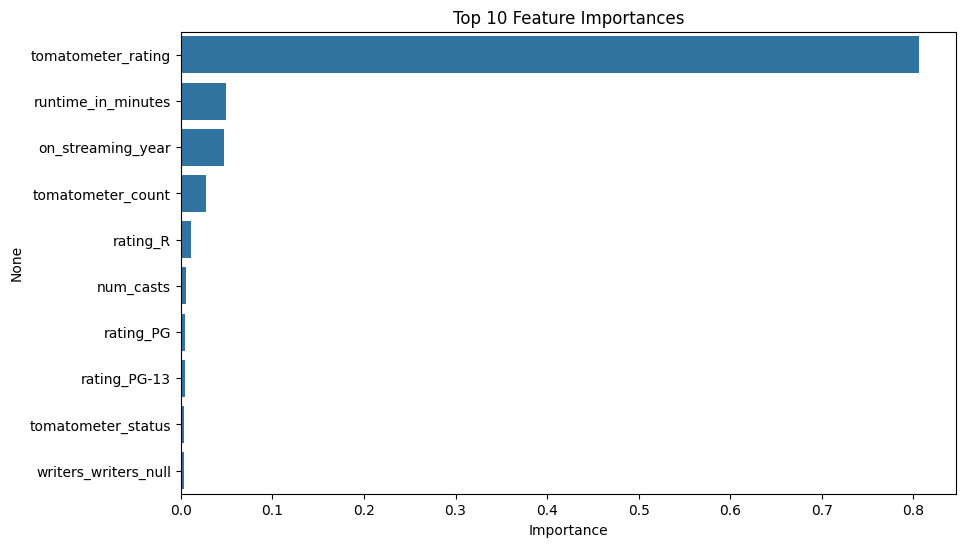

In [38]:
from sklearn.model_selection import cross_val_score
# Cross-validation for best model
cross_val_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f'\nCross-validated R2 scores: {cross_val_scores}\nMean Cross-validated R2 score: {np.mean(cross_val_scores):.2f}\n')

# Feature importance for tree-based models
if hasattr(best_model.named_steps['regressor'], 'feature_importances_'):
    importance = best_model.named_steps['regressor'].feature_importances_
    feature_names = numerical_cols.tolist() + list(best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols))
    feature_importances = pd.Series(importance, index=feature_names)

    top_features = feature_importances.sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_features, y=top_features.index)
    plt.title('Top 10 Feature Importances')
    plt.xlabel('Importance')
    plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_684\3669758703.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=results_df, palette='viridis')


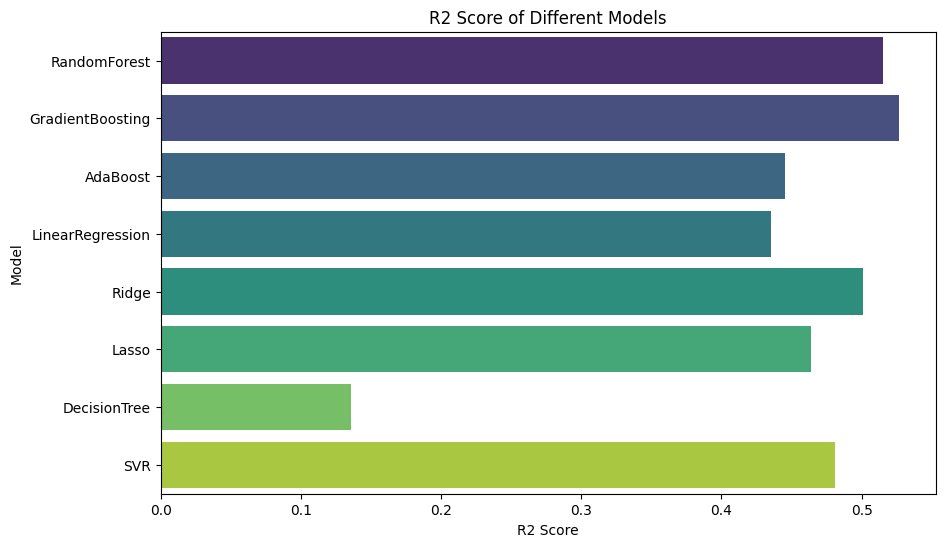


Overall Model Results:

              Model         MSE        R2
1  GradientBoosting  197.899943  0.526458
0      RandomForest  202.551073  0.515328
4             Ridge  208.419926  0.501285
7               SVR  216.971371  0.480823
5             Lasso  224.074057  0.463827
2          AdaBoost  231.816817  0.445300
3  LinearRegression  235.834598  0.435686
6      DecisionTree  361.269677  0.135540


In [39]:
# Summary of Model Performance
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
sns.barplot(x='R2', y='Model', data=results_df, palette='viridis')
plt.title('R2 Score of Different Models')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.show()

print("\nOverall Model Results:\n")
print(results_df.sort_values(by='R2', ascending=False))